In [16]:
pip install netCDF4

     ---------------------------------------- 0.0/6.6 MB ? eta -:--:--
     ---------------------------------------- 0.1/6.6 MB 1.7 MB/s eta 0:00:04
     ---------------------------------------- 0.1/6.6 MB 787.7 kB/s eta 0:00:09
      --------------------------------------- 0.1/6.6 MB 726.2 kB/s eta 0:00:09
      --------------------------------------- 0.1/6.6 MB 599.1 kB/s eta 0:00:11
      --------------------------------------- 0.2/6.6 MB 510.2 kB/s eta 0:00:13
     - -------------------------------------- 0.2/6.6 MB 512.0 kB/s eta 0:00:13
     - -------------------------------------- 0.2/6.6 MB 479.2 kB/s eta 0:00:14
     - -------------------------------------- 0.2/6.6 MB 464.5 kB/s eta 0:00:14
     - -------------------------------------- 0.2/6.6 MB 464.5 kB/s eta 0:00:14
     - -------------------------------------- 0.2/6.6 MB 464.5 kB/s eta 0:00:14
     - -------------------------------------- 0.3/6.6 MB 441.9 kB/s eta 0:00:15
     - -------------------------------------- 0.3/6

In [20]:
pip install h5netcdf


     ---------------------------------------- 0.0/2.6 MB ? eta -:--:--
     ---------------------------------------- 0.0/2.6 MB ? eta -:--:--
      --------------------------------------- 0.0/2.6 MB ? eta -:--:--
     - -------------------------------------- 0.1/2.6 MB 1.1 MB/s eta 0:00:03
     - -------------------------------------- 0.1/2.6 MB 744.7 kB/s eta 0:00:04
     -- ------------------------------------- 0.2/2.6 MB 752.9 kB/s eta 0:00:04
     -- ------------------------------------- 0.2/2.6 MB 692.9 kB/s eta 0:00:04
     --- ------------------------------------ 0.2/2.6 MB 653.6 kB/s eta 0:00:04
     --- ------------------------------------ 0.3/2.6 MB 655.4 kB/s eta 0:00:04
     ---- ----------------------------------- 0.3/2.6 MB 654.1 kB/s eta 0:00:04
     ---- ----------------------------------- 0.3/2.6 MB 654.1 kB/s eta 0:00:04
     ---- ----------------------------------- 0.3/2.6 MB 654.1 kB/s eta 0:00:04
     ---- ----------------------------------- 0.3/2.6 MB 654.1 kB/s 

In [1]:
import numpy as np
import geopandas
import rioxarray
import xarray as xr
from shapely.geometry import mapping
import matplotlib.pyplot as plt
import numpy.ma as ma
import datetime
from matplotlib import image as im
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import cm
import cartopy.crs as ccrs
import pandas as pd
import packaging
import netCDF4 
import h5netcdf

In [2]:
dataset=xr.open_dataset("./nc_files/CO2/cams73_latest_co2_col_surface_inst_197901.nc")

#datarray_CO2=dataset.XCO2


In [9]:
path= "./nc_files/CO2/cams73_latest_co2_col_surface_inst_{}01.nc"
CO2=np.zeros([42,1])
time=np.arange(1979,2021,1)
i=1979
j=0
while i<2021:
    dataset=xr.open_dataset(path.format(i))
    datarray_CO2=dataset.XCO2
    agg = (datarray_CO2.resample(time="1MS", restore_coord_dims=True).sum(dim='time'))/31
    agg=np.array(agg)
    av=np.average(agg)
    CO2[j]=av
    
    i=i+1
    j=j+1

CO2=CO2*28.97 / 44.01 * 1e6

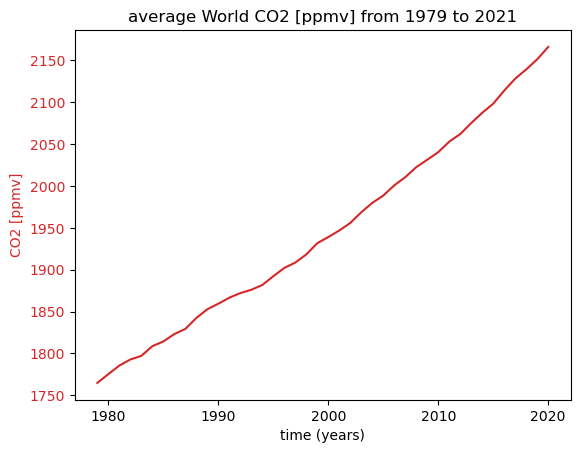

In [11]:
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('time (years)')
ax1.set_ylabel('CO2 [ppmv]', color=color)
ax1.set_title('average World CO2 [ppmv] from 1979 to 2021')
ax1.plot(time, CO2, color=color)
ax1.tick_params(axis='y', labelcolor=color)